In [1]:
import numpy as np
import re
import nltk
import pandas as pd
from time import time
from sklearn.datasets import load_files
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
nltk.download('wordnet')
nltk.download('stopwords')
import pickle
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , accuracy_score ,f1_score,confusion_matrix
from sklearn.neighbors import NearestCentroid, KNeighborsClassifier

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lamad\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lamad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
#  Dataset is found here -raw text files version-  :
#  http://mlg.ucd.ie/datasets/bbc.html

#Loading Data from Directory

dir =r"./bbc/"
data=load_files(dir,encoding='utf-8',decode_error="replace")

#Class Labels

X=data.data
y= data.target

labels,counts=np.unique(data.target,return_counts=True)
print("Count of the labels:")

for i in range(5):
    print(labels[i],"=",counts[i])

#0: business
#1: entertainment
#2: politics
#3: sports
#4: tech

Count of the labels:
0 = 510
1 = 386
2 = 417
3 = 511
4 = 401


In [6]:
#Preprocessing using Lemmatization

documents = []
Lemmatizer = WordNetLemmatizer()
stemmer=PorterStemmer()

for sen in range(0, len(X)):
 
    # Removing special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    # Removing single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Removing single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
   
    # Converting to Lowercase
    document = document.lower()

    # Tokenization
    document = document.split()

    # Lemmatization
    document = [Lemmatizer.lemmatize(word) for word in document]
    
#if we want to use a Stemmer instead of Lemmatizer, done by deleteing the previous line of code and adding this line
    
    #document = [stemmer.stem(word) for word in document]
    
    document = ' '.join(document)
    documents.append(document)

In [7]:
#Bag of Word represenation of the data

vectorizer = CountVectorizer( stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()

In [8]:
#Saving the data into our device as a csv. file -optional-

columns = vectorizer.get_feature_names()
x = pd.DataFrame(X, columns= columns)
x.to_csv("BBC.csv")

In [9]:
#TF-IDF representaion of the data

tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

In [10]:
#Splitting the data into Training and Test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
#Rocchio's Classification

Roc = NearestCentroid(metric='manhattan')
t0 = time()
Roc.fit(X_train,y_train)
Roc_train_time = time() - t0
print("Train time:   %0.3fs" % Roc_train_time)
t0 = time()
Roc_pred=Roc.predict(X_test)
Roc_test_time = time() - t0
print("Test time :   %0.3fs" % Roc_test_time)
Roc_score=accuracy_score(y_test, Roc_pred)
print("Accuracy  :     %0.3f" % Roc_score)

Train time:   1.156s
Test time :   0.291s
Accuracy  :     0.645


In [12]:
#K-Nearest-Neigbors Classification

Knn=KNeighborsClassifier(n_neighbors=9)
t0 = time()
Knn.fit(X_train,y_train)
Knn_train_time = time() - t0
print("Train time :  %0.3fs" % Knn_train_time)
t0 = time()
Knn_pred=Knn.predict(X_test)
Knn_test_time = time() - t0
print("Test time  :   %0.3fs" % Knn_test_time)
Knn_score=accuracy_score(y_test, Knn_pred)
print("Accuracy   :    %0.3f" % Knn_score)

Train time :  0.121s
Test time  :   1.559s
Accuracy   :    0.937


In [19]:
# Classification Report

print("Rocchio's Classification :")
print(classification_report(y_test, Roc_pred))  
print(f"Accuracy score         {accuracy_score(y_test, Roc_pred) * 100} %")
print("Confusion matrix      ")
print(confusion_matrix(y_test, Roc_pred))
print()
print()
print("K-Nearest-Neigbors Classification :")
print(classification_report(y_test, Knn_pred))
print(f"Accuracy score         {accuracy_score(y_test, Knn_pred) * 100} %")
print("Confusion matrix      ")
print(confusion_matrix(y_test, Knn_pred))

Rocchio's Classification :
              precision    recall  f1-score   support

           0       0.61      0.59      0.60       102
           1       0.58      0.71      0.64        84
           2       0.73      0.69      0.71        78
           3       0.68      0.70      0.69       103
           4       0.65      0.53      0.58        78

    accuracy                           0.64       445
   macro avg       0.65      0.64      0.64       445
weighted avg       0.65      0.64      0.64       445

Accuracy score         64.49438202247191 %
Confusion matrix      
[[60 13 13 12  4]
 [12 60  1  7  4]
 [ 6  8 54  6  4]
 [ 8 13  0 72 10]
 [13  9  6  9 41]]


K-Nearest-Neigbors Classification :
              precision    recall  f1-score   support

           0       0.95      0.86      0.90       102
           1       0.97      0.89      0.93        84
           2       0.87      0.96      0.91        78
           3       0.97      0.99      0.98       103
           4      

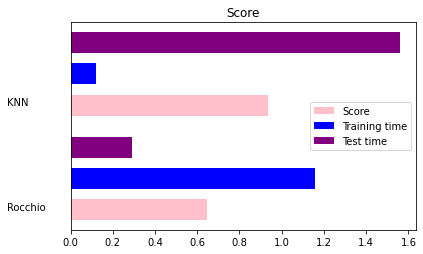

In [20]:
#Visualizing test and training time and score
results = [Roc.fit(X_train,y_train),Knn.fit(X_train,y_train)]
indices = np.arange(len(results))
score=[Roc_score,Knn_score]
training_time=[Roc_train_time,Knn_train_time]
test_time=[Roc_test_time,Knn_test_time]

plt.figure(figsize=(6, 6))
plt.title("Score")
plt.barh(indices, score, 0.2, label="Score", color="pink")
plt.barh(indices + 0.3, training_time, 0.2, label="Training time", color="blue")
plt.barh(indices + 0.6, test_time, 0.2, label="Test time", color="purple")
plt.yticks(())
plt.legend(loc="best")
plt.subplots_adjust(left=0.1)
plt.subplots_adjust(top=0.5)
plt.subplots_adjust(bottom=0.02)
names=["Rocchio","KNN"]
for i, c in zip(indices, names):
    plt.text(-0.3, i, c)
plt.show()